In [42]:
import numpy as np
import pandas as pd

df = pd.read_csv("athlete_events.csv.zip")
region_df = pd.read_csv("noc_regions.csv")
df.head()




,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [43]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [44]:
df.shape

(271116, 15)

In [45]:
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [46]:
df = df.merge(region_df, how='left', on='NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [47]:
df['region'].unique().shape

(206,)

In [48]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [49]:
df.duplicated().sum()

np.int64(1385)

In [50]:
df.drop_duplicates(inplace=True)


In [51]:
df.duplicated().sum()

np.int64(0)

In [52]:
df['Medal'].value_counts()

Medal
Gold      13369
Bronze    13295
Silver    13108
Name: count, dtype: int64

In [53]:
pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,False,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,False,False,False
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,False,False,False
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,False,True,False
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN,False,False,False
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN,False,False,False
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN,False,False,False
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN,False,False,False


In [54]:
df[df['Medal'].notna()].groupby(['NOC', 'Medal']).size().unstack(fill_value=0)[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index().head(25)




Medal,NOC,Gold,Silver,Bronze
0,USA,2638,1641,1358
1,URS,1082,732,689
2,GER,745,674,746
3,GBR,677,739,651
4,ITA,575,531,531
5,FRA,499,602,666
6,SWE,479,522,535
7,CAN,463,438,451
8,HUN,432,332,371
9,GDR,397,327,281


In [55]:
df[(df['NOC']== 'IND') & (df['Medal']== 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4732,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
4736,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN
5032,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
5033,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN
5034,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233749,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN
236445,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN
236446,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN
250689,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN


In [56]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
medal_tally = df[df['Medal'].notna()].groupby(['NOC', 'Medal']).size().unstack(fill_value=0)[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
medal_tally['Total']= medal_tally['Gold'] + medal_tally['Silver'] + medal_tally["Bronze"]
medal_tally

Medal,NOC,Gold,Silver,Bronze,Total
0,USA,2638,1641,1358,5637
1,URS,1082,732,689,2503
2,GER,745,674,746,2165
3,GBR,677,739,651,2067
4,ITA,575,531,531,1637
...,...,...,...,...,...
144,SRI,0,2,0,2
145,SUD,0,1,0,1
146,UAR,0,1,1,2
147,WIF,0,0,5,5


In [57]:
medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])


In [58]:
medal_tally[medal_tally['NOC']=='IND']

Medal,NOC,Gold,Silver,Bronze,Total
23,IND,138,19,40,197


In [59]:
def fetch_medal_tally(Years, country):
    if Years == 'Overall' and country == 'Overall':
        temp_df = medal_df.copy()
    elif Years == 'Overall' and country != 'Overall':
        temp_df = medal_df[medal_df['region'] == country]
    elif Years != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == Years]
    else:
        temp_df = medal_df[(medal_df['Year'] == Years) & (medal_df['region'] == country)]

    
    temp_df = temp_df.groupby(['NOC', 'Medal']).size().unstack(fill_value=0)

    
    temp_df = temp_df.reindex(columns=['Gold', 'Silver', 'Bronze'], fill_value=0)

    
    temp_df = temp_df.sort_values('Gold', ascending=False).reset_index()
    temp_df['Total'] = temp_df['Gold'] + temp_df['Silver'] + temp_df['Bronze']

    return temp_df


fetch_medal_tally('Overall', 'India')    




Medal,NOC,Gold,Silver,Bronze,Total
0,IND,10,7,12,29


In [60]:
nation_over_time = (df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index(name='count').rename(columns={'index': 'Year'}).sort_values('Year'))                
nation_over_time

,Year,count
34,1896,12
28,1900,31
33,1904,14
32,1906,20
31,1908,22
30,1912,29
29,1920,29
26,1924,46
27,1928,46
25,1932,47


In [61]:
nation_over_time.rename(columns={'Year': 'Edition', 'count': 'No of countries'}, inplace=True)
print(nation_over_time.columns)


Index(['Edition', 'No of countries'], dtype='object')


In [62]:
import plotly.express as px

fig = px.line(nation_over_time,
    x='Edition',
    y='No of countries',
    title='Number of nations over the years'
)
fig.show()


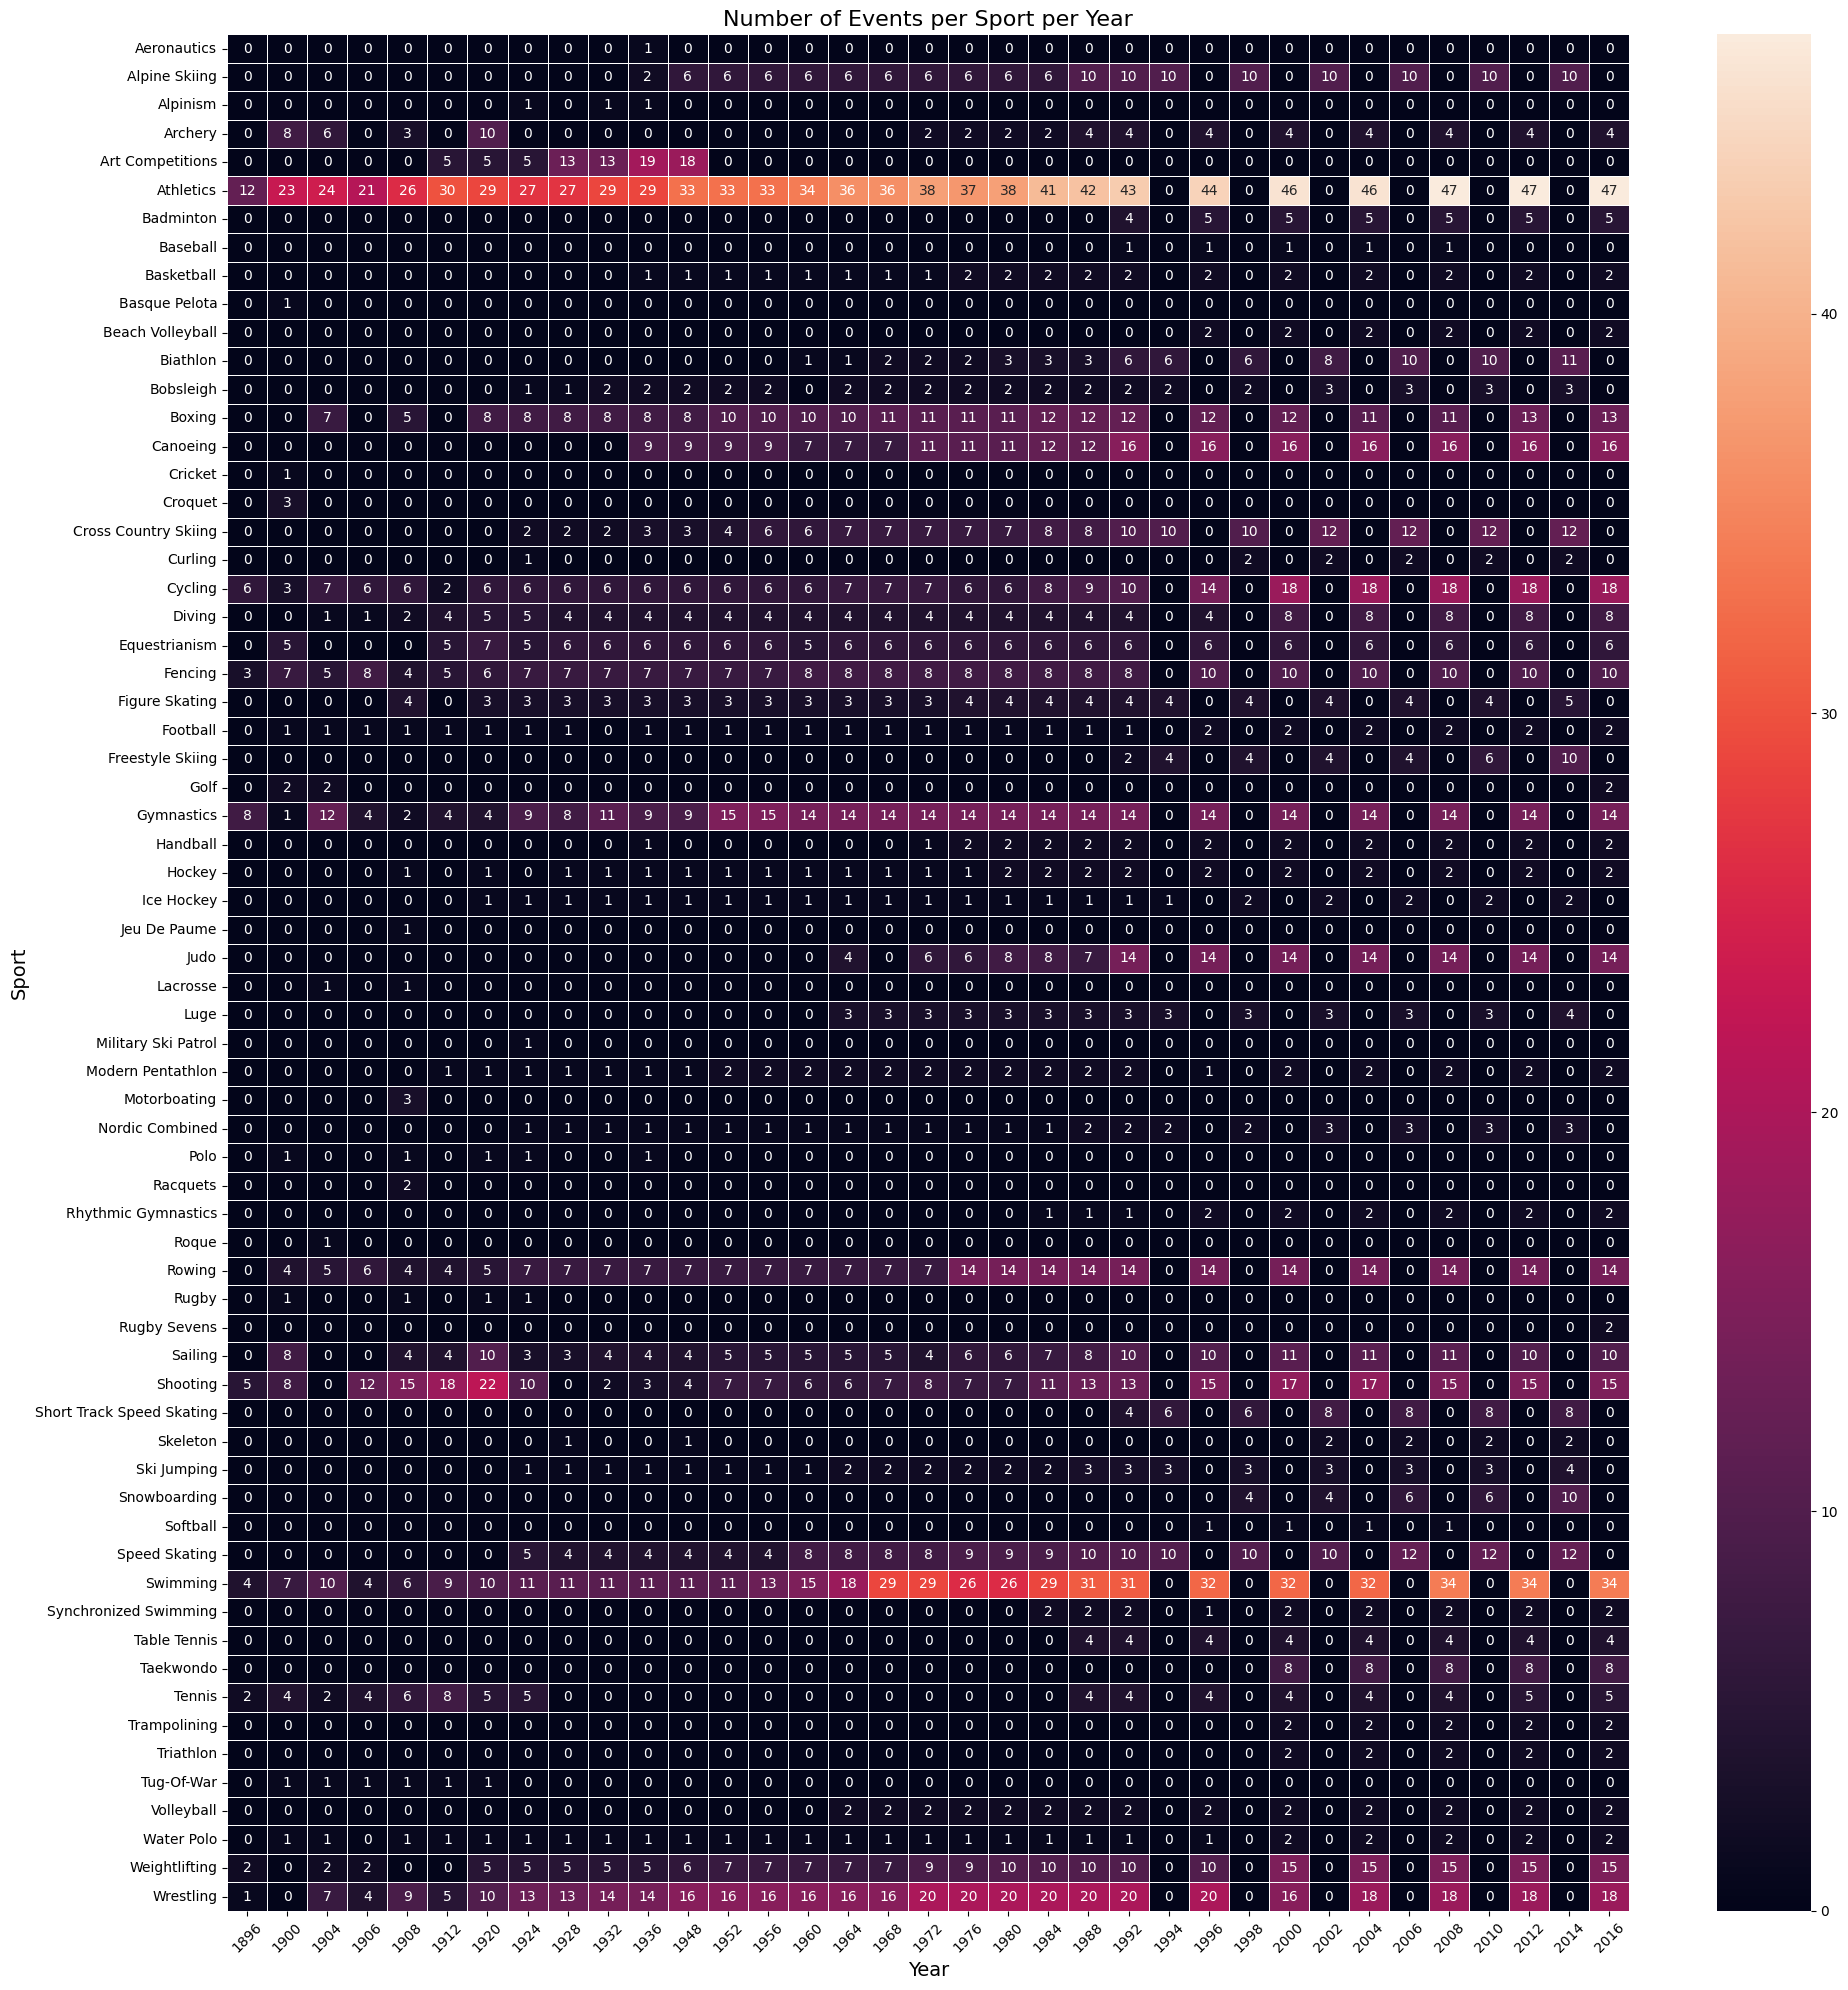

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

df.drop_duplicates(subset=['Sport', 'Year', 'Event'], inplace=True)
pivot = df.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype(int)


plt.figure(figsize=(20, 20))
sns.heatmap(pivot, annot=True, linewidths=0.5)


plt.title("Number of Events per Sport per Year", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Sport", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()


In [64]:
def most_successful_by_sport(df, sport='Overall', top_n=10):
    
    medal_df = df[df['Medal'].notna()]
    if sport != 'Overall':
        medal_df = medal_df[medal_df['Sport'] == sport]
    
    grouped = medal_df.groupby('Name').size().reset_index(name='Total Medals')
    sport_info = medal_df[['Name', 'Sport']].drop_duplicates('Name')
    result = grouped.merge(sport_info, on='Name', how='left')
    result = result.sort_values(by='Total Medals', ascending=False).head(top_n).reset_index(drop=True)
    return result

most_successful_by_sport(df, sport='Swimming', top_n=10)


,Name,Total Medals,Sport
0,"Rebecca ""Becky"" Adlington",4,Swimming
1,"Charles Meldrum ""Charlie"" Daniels",3,Swimming
2,Nathan Ghar-Jun Adrian,3,Swimming
3,"Christine M. ""Crissy"" Ahmann-Leighton (-Perham)",3,Swimming
4,"Janice ""Jan"" Andrew (-Thornett)",2,Swimming
5,Malin Therse Alshammar,2,Swimming
6,Arvo Ossian Aaltonen,2,Swimming
7,Yannick Agnel,2,Swimming
8,Viktor Andreyevich Aboimov,2,Swimming
9,Walter Brack,2,Swimming


In [65]:

temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(
    subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'],
    inplace=True
)
new_df = temp_df[temp_df['region'] == 'USA']
final_df = new_df.groupby('Year')['Medal'].count()
final_df



C:\Users\lenovo\AppData\Local\Temp\ipykernel_28336\689450775.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Year
1896     7
1900     8
1904    44
1906     1
1908     3
1912     3
1920     8
1924     3
1928     3
1932    16
1936     2
1948     4
1952     5
1956     4
1960     1
1964     7
1968     1
1972     2
1976     3
1984     4
1988     1
1992     4
1996     3
2000     2
2004     3
2006     1
2008     4
2010     2
2012     6
2014     4
2016     4
Name: Medal, dtype: int64

In [66]:
final_df = new_df.groupby(['Year','Medal']).size().reset_index(name='Count')

fig = px.line(final_df, x='Year', y='Count', color='Medal',markers=True,title="USA Medal Tally by Type")
fig.show()


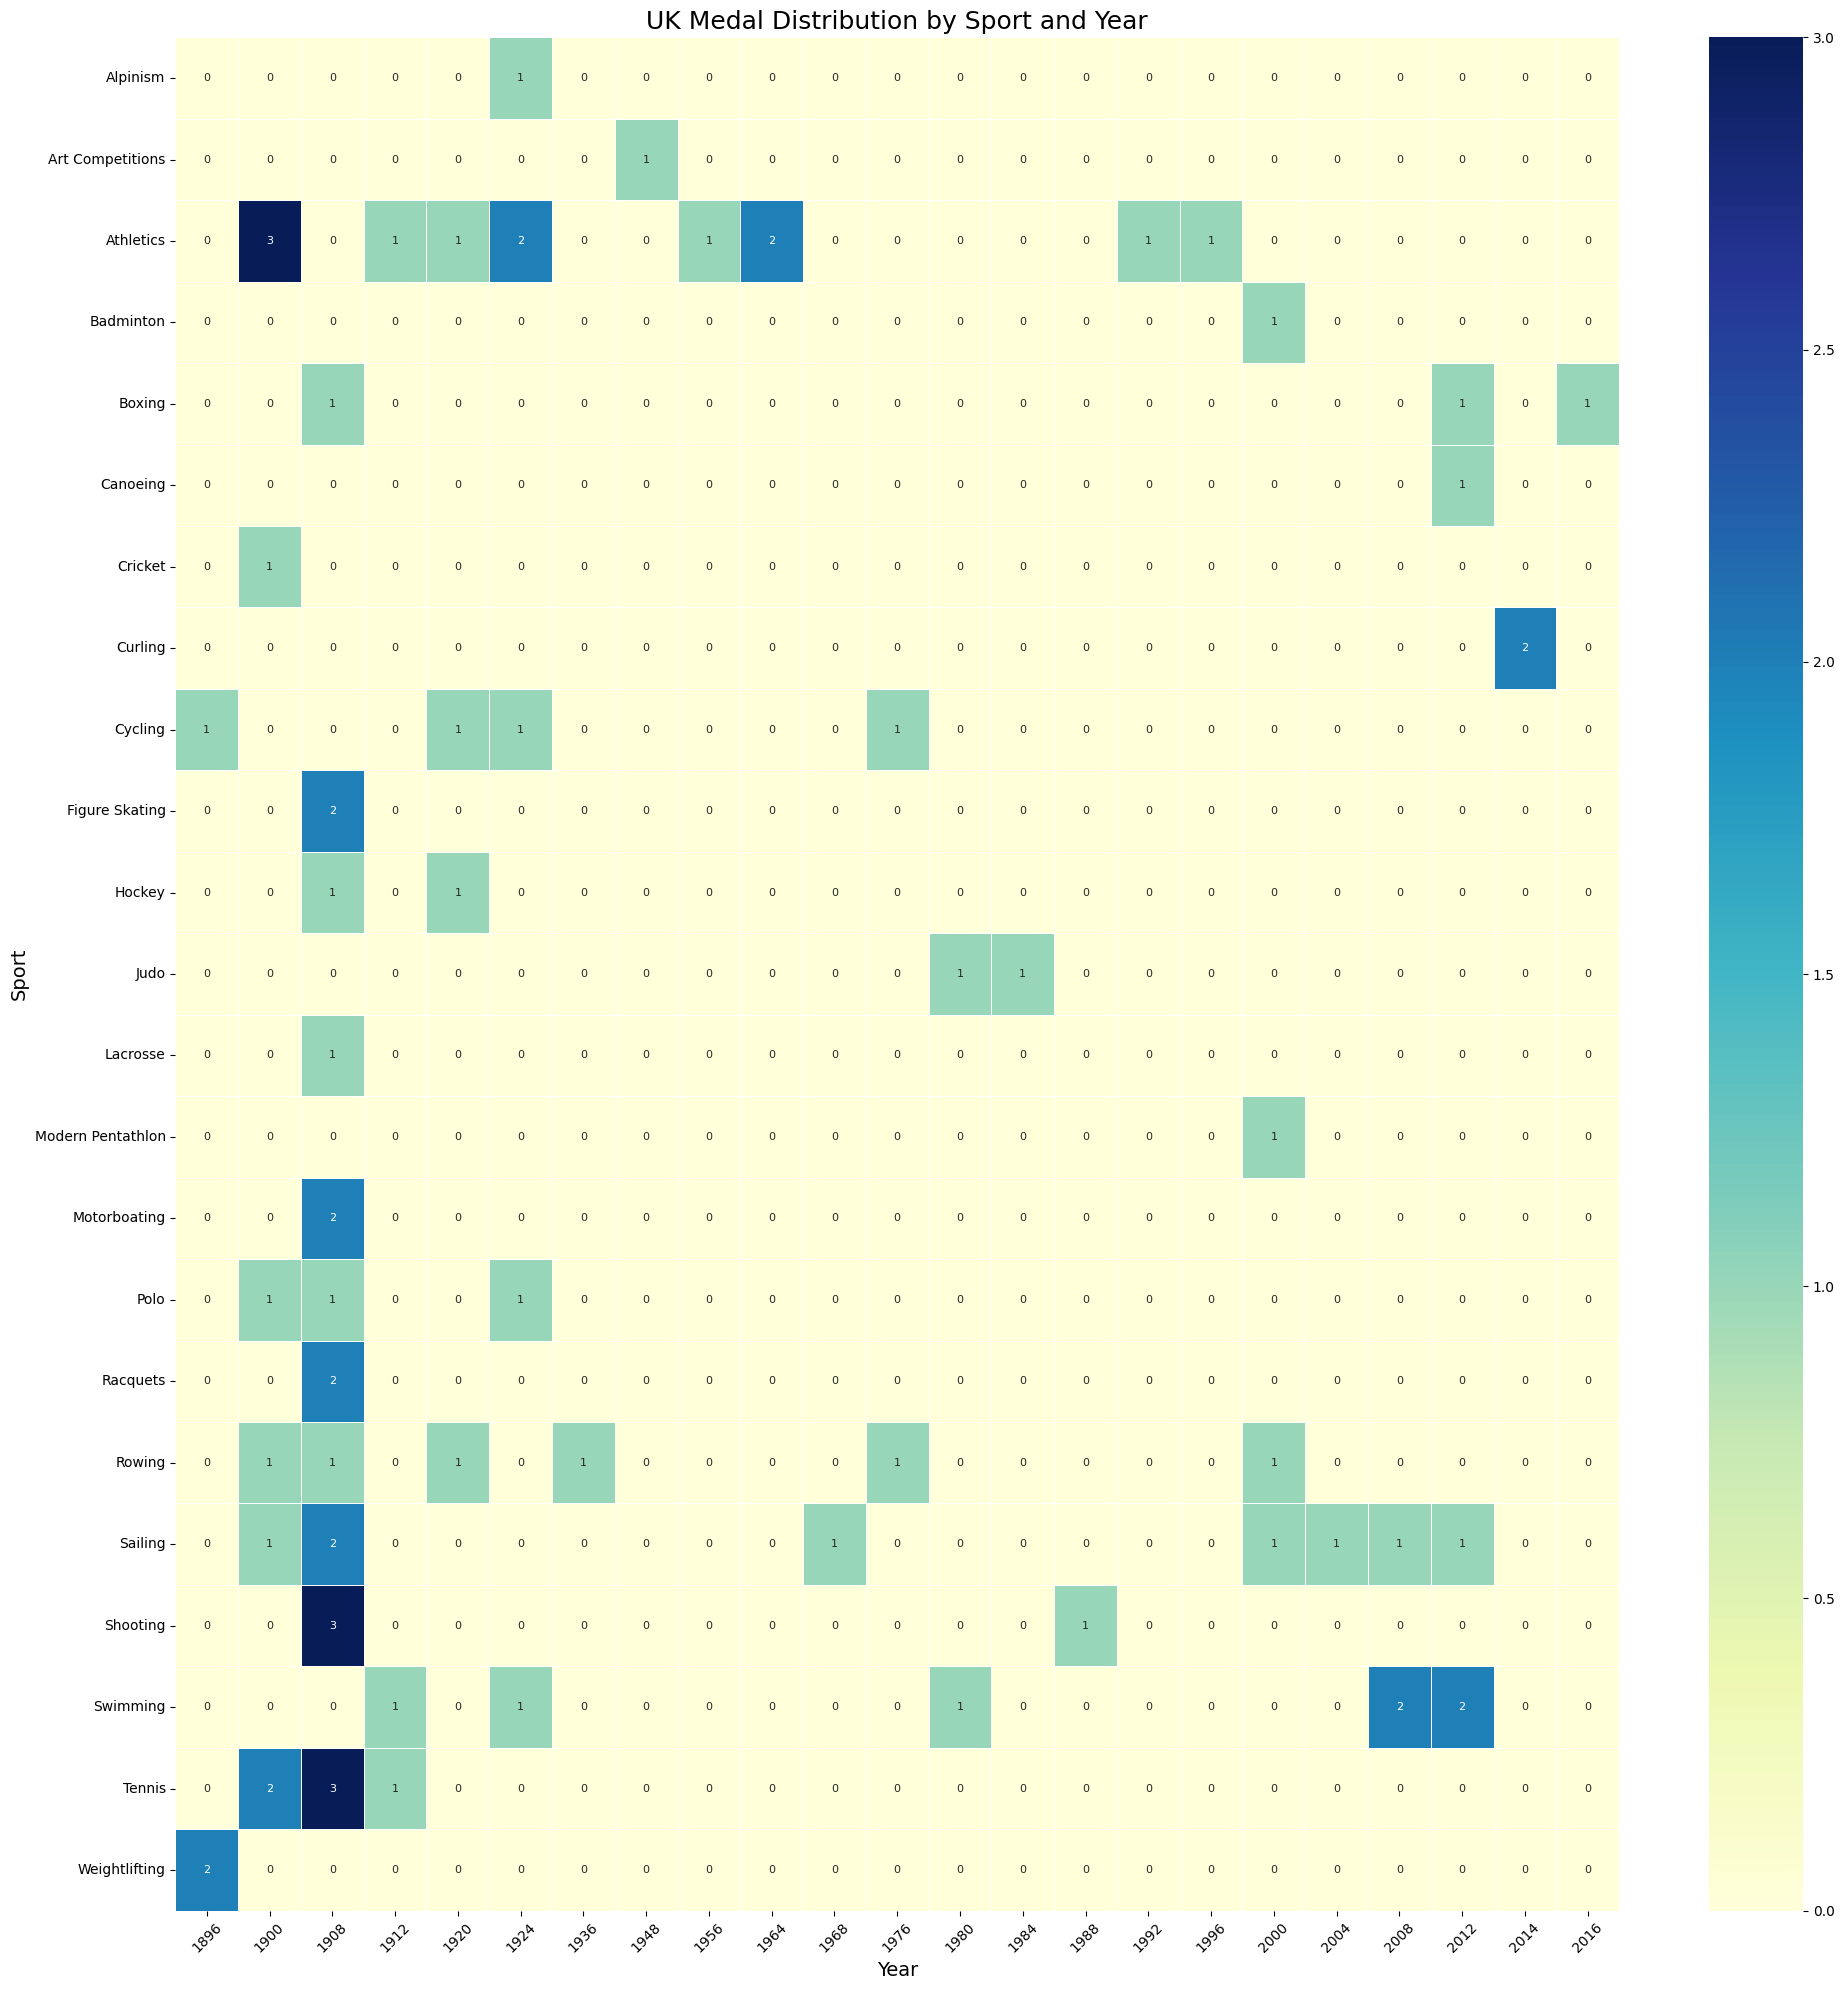

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns


new_df = temp_df[temp_df['region'] == 'UK']


pivot = new_df.pivot_table(
    index='Sport',
    columns='Year',
    values='Medal',
    aggfunc='count'
).fillna(0)


plt.figure(figsize=(20, 20))
sns.heatmap(
    pivot,
    annot=True,
    cmap="YlGnBu",
    linewidths=0.5,
    annot_kws={"size": 8}   
)

plt.title("UK Medal Distribution by Sport and Year", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Sport", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [68]:
import pandas as pd
import plotly.express as px


athlete_df = df.drop_duplicates(subset=['Name', 'region'])


age_data = pd.concat([
    pd.DataFrame({'Age': df['Age'].dropna(), 'Category': 'Overall medalist'}),
    pd.DataFrame({'Age': df[df['Medal']=='Gold']['Age'].dropna(), 'Category': 'Gold medalist'}),
    pd.DataFrame({'Age': df[df['Medal']=='Silver']['Age'].dropna(), 'Category': 'Silver medalist'}),
    pd.DataFrame({'Age': df[df['Medal']=='Bronze']['Age'].dropna(), 'Category': 'Bronze medalist'})
])


fig = px.histogram(
    age_data,
    x='Age',
    color='Category',
    nbins=30,
    marginal="violin",
    histnorm='probability density',
    barmode='overlay'  
)

fig.show()


In [69]:
import plotly.express as px
import pandas as pd

x = []
name = []
olympic_sports = [
    "Archery", "Artistic Swimming", "Athletics", "Badminton", "Basketball",
    "Boxing", "Canoeing", "Cycling", "Diving", "Equestrian", "Fencing",
    "Football", "Golf", "Gymnastics", "Handball", "Hockey", "Judo",
    "Karate", "Modern Pentathlon", "Rowing", "Rugby Sevens", "Sailing",
    "Shooting", "Skateboarding", "Sport Climbing", "Surfing", "Swimming",
    "Table Tennis", "Taekwondo", "Tennis", "Triathlon", "Volleyball",
    "Water Polo", "Weightlifting", "Wrestling",
    "Alpine Skiing", "Biathlon", "Bobsleigh", "Cross-Country Skiing",
    "Curling", "Figure Skating", "Freestyle Skiing", "Ice Hockey",
    "Luge", "Nordic Combined", "Short Track Speed Skating",
    "Skeleton", "Ski Jumping", "Snowboarding", "Speed Skating"
]


for sport in olympic_sports:
    temp_df = athlete_df[(athlete_df['Sport'] == sport) & (athlete_df['Medal'] == 'Gold')]
    ages = temp_df['Age'].dropna()
    if len(ages) > 0:
        x.extend(ages)
        name.extend([sport]*len(ages))


plot_df = pd.DataFrame({'Age': x, 'Sport': name})
fig = px.histogram(
    plot_df,
    x='Age',
    color='Sport',
    nbins=30,
    marginal="violin",
    histnorm='probability density',
    barmode='overlay'
)
fig.show()

 

C:\Users\lenovo\AppData\Local\Temp\ipykernel_28336\3708501617.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\lenovo\AppData\Local\Temp\ipykernel_28336\3708501617.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



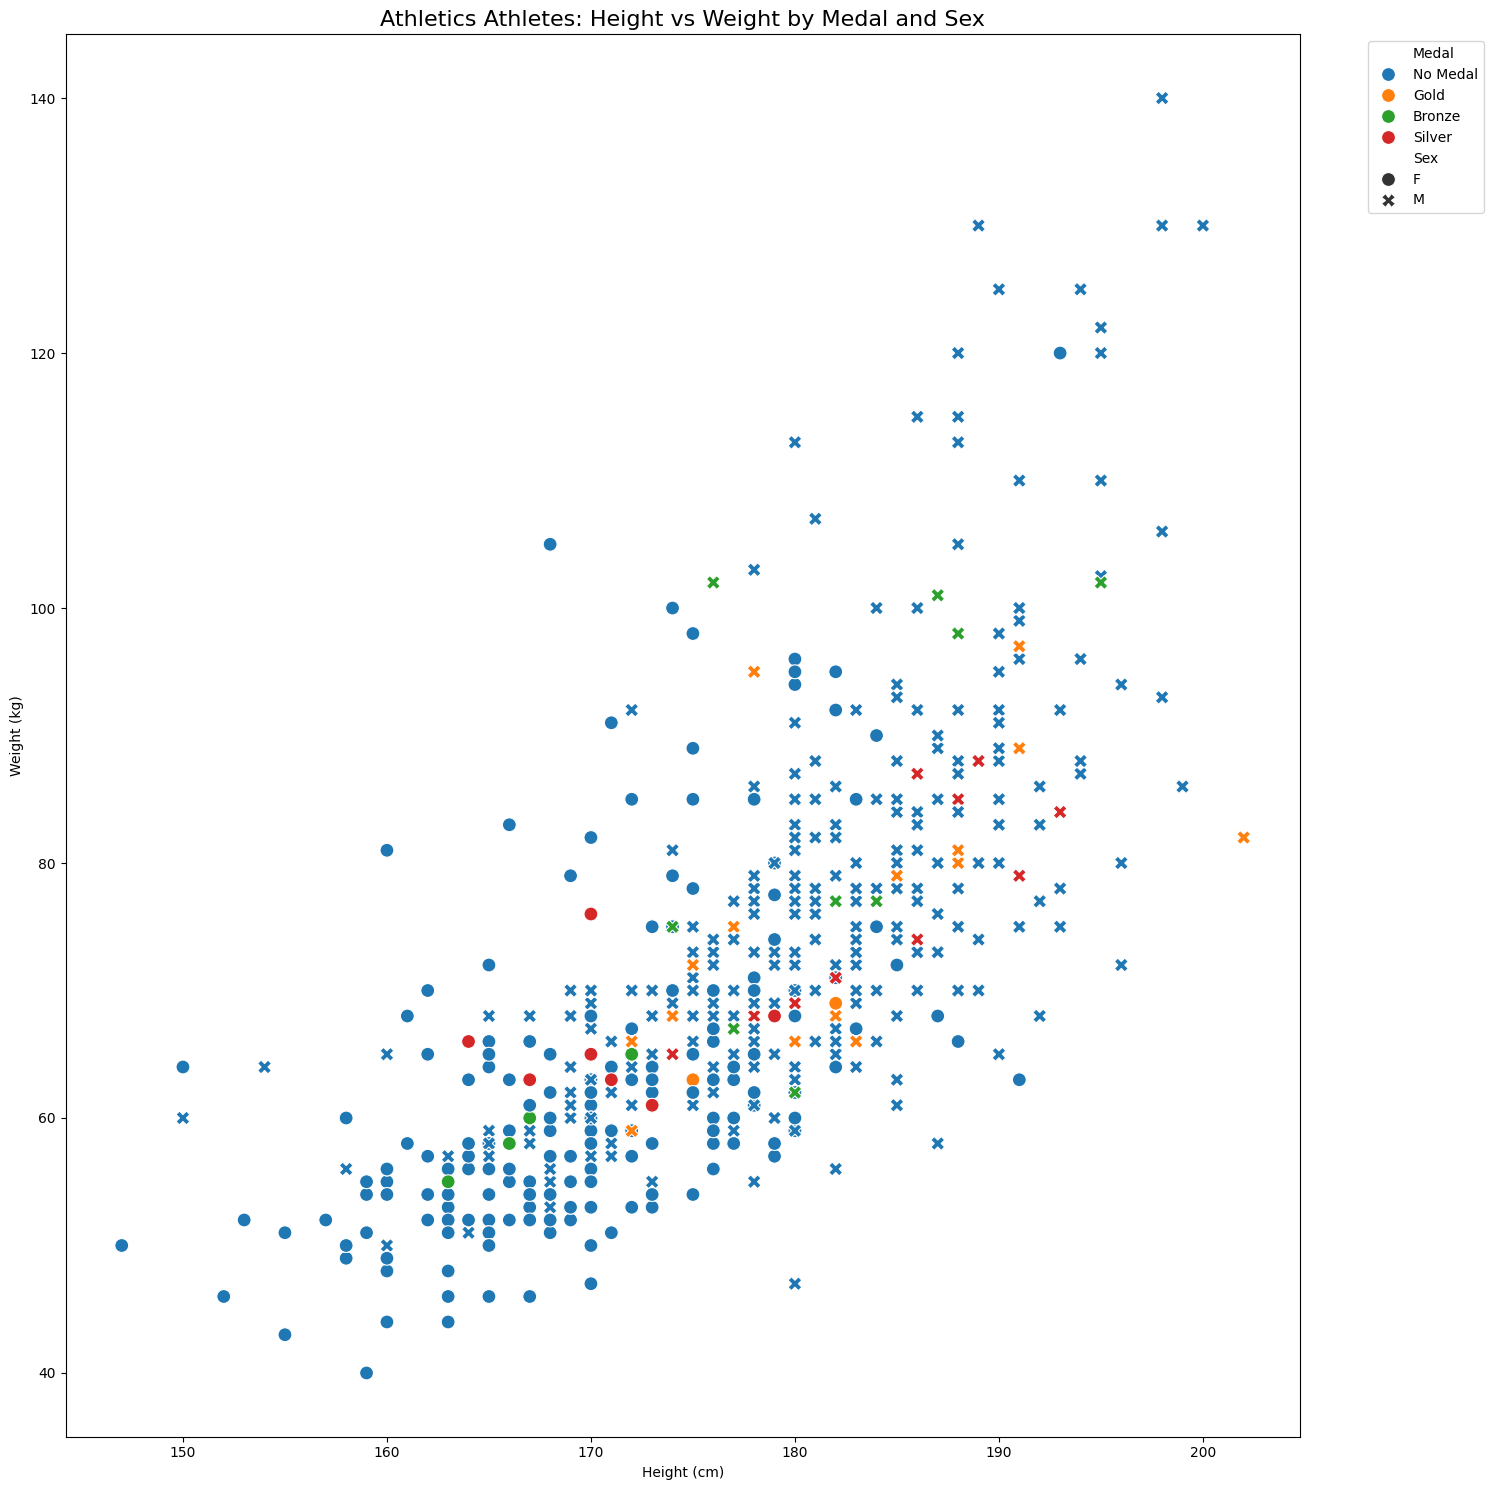

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

athlete_df['Medal'].fillna('No Medal', inplace=True)
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
plt.figure(figsize=(15, 15))
sns.scatterplot(
    data=temp_df,
    x='Height',
    y='Weight',
    hue='Medal',        
    style='Sex',        
    s=100               
)

plt.title("Athletics Athletes: Height vs Weight by Medal and Sex", fontsize=16)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:

men = (
    athlete_df[athlete_df['Sex'] == 'M']        
    .groupby('Year')['Name']
    .nunique()                                     
    .reset_index(name='Male')                     
)


women = (
    athlete_df[athlete_df['Sex'] == 'F']           
    .groupby('Year')['Name']
    .nunique()
    .reset_index(name='Female')
)


final = men.merge(women, on='Year', how='outer').fillna(0)


final['Male'] = final['Male'].astype(int)
final['Female'] = final['Female'].astype(int)

final


ValueError: All arguments should have the same length. The length of argument `y` is 1, whereas the length of previously-processed arguments ['Year'] is 35

In [ ]:
import plotly.express as px
custom_colors = ['blue', 'pink']

fig = px.line(
    final,
    x='Year',
    y=['Male', 'Female'],
    markers=True,
    title="Olympic Participation: Men vs Women Over the Years",
    color_discrete_sequence=custom_colors      
)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Athletes",
    legend_title="Gender"
)

fig.show()


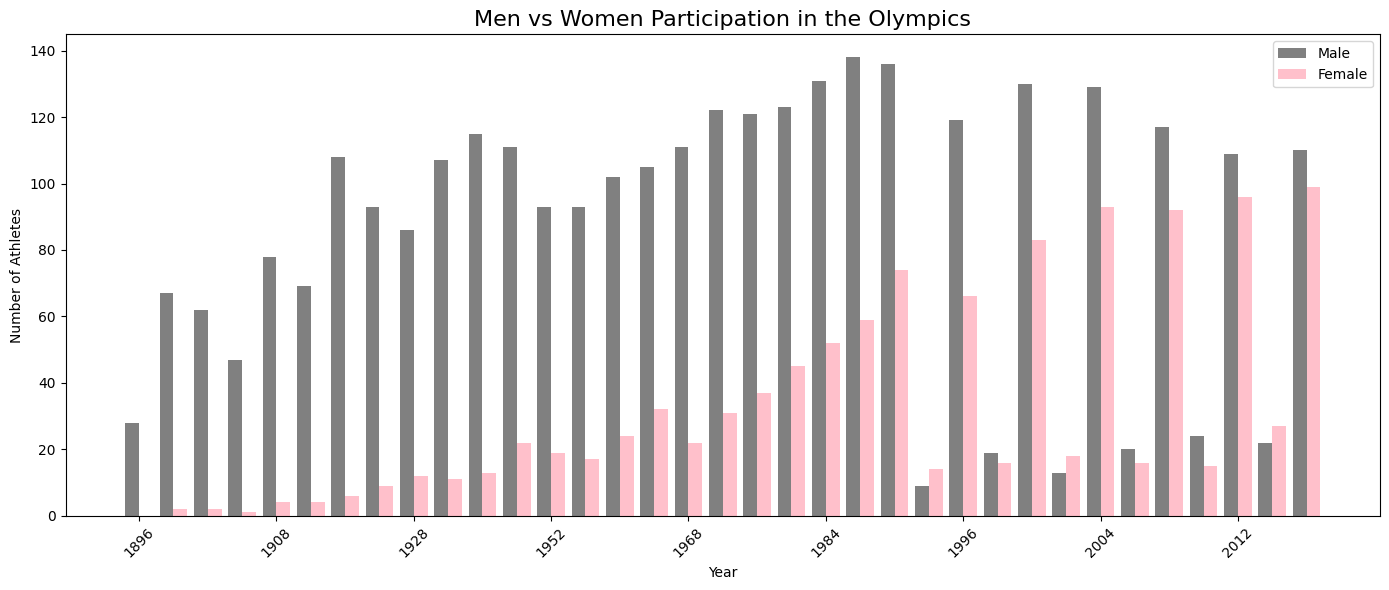

In [ ]:
import numpy as np

x = np.arange(len(final['Year']))  # positions for the bars
width = 0.4                         # width of each bar

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, final['Male'], width, label='Male', color='gray')
plt.bar(x + width/2, final['Female'], width, label='Female', color='pink')

plt.xticks(x[::4], final['Year'][::4], rotation=45)  # show every 4th year
plt.title("Men vs Women Participation in the Olympics", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.legend()
plt.tight_
